## Exploratory Data Analysis [ EDA ] - Salaries Dataset
    This notebook performs exploratory data analysis on an employee salaries datasetto understand pay distribution, employee roles, and compensation patterns.


In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the Dataset 

In [502]:
df = pd.read_csv("Salaries.csv")

### Look at the dataset first

In [504]:
df.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


**Observation :-**
The dataset contains employee-related salary information including BasePay,
OvertimePay, OtherPay, Benefits, and total compensation values.
details

### Find Shape of Our Dataset [ Number of Rows And Number of Columns ]

In [507]:
print("Number of rows :: ",df.shape[0])
print("Number of column :: ",df.shape[1])

Number of rows ::  148654
Number of column ::  13


- Each row represents an individual employee record  
- Each column represents salary components or employee attributes  
- The dataset size indicates it is suitable for exploratory analysis

### Dataset Information  

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


- Most columns are non-null  
- Data types are appropriate for analysis  
- Some immediate missing value issue observed
- Most columns are numerical, while job-related fields are categorical.
- Some salary-related columns contain missing values, which may require cleaning
before modeling.


### Check Null Values In The Dataset

In [513]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

- The Dataset contain some amount of null values ::
- BasePay column - 609 null values
- OvertimePay and OtherPay - 4 null values
- Benefits - 36163 null values
- Notes - 148654 null values
- Status - 148654 null values
- Some of the column doesn't have that much importance like status and Notes so we can drop the entire column 

### Drop ID, Notes, Agency, and Status Columns

In [516]:
df.drop(['Id','Notes','Agency','Status'],axis = 'columns' ,inplace = True )

In [517]:
df.columns  # Now the ID, Notes, Agency, and Status Columns are drop from the dataset 

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

- The cloumn ID, Notes, Agency, and Status are not that effective for further implementation like Exploratory Data Analysis and machine learning model

### Get Overall Statistics About The Dataframe

In [520]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


- Salary-related columns show high variation, indicating significant differences
in employee compensation. Large gaps between minimum and maximum values suggest
the presence of outliers.


###  Find Occurrence of The Employee Names  [ Top 5 ]

In [523]:
df['EmployeeName'].value_counts().head()

EmployeeName
Kevin Lee       13
Richard Lee     11
Steven Lee      11
William Wong    11
Stanley Lee      9
Name: count, dtype: int64

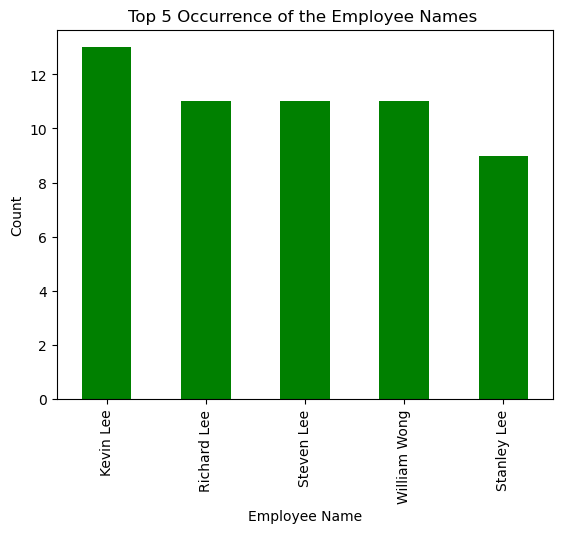

In [591]:
df['EmployeeName'].value_counts().head().plot(kind = 'bar',color='green')
plt.title("Top 5 Occurrence of the Employee Names ")
plt.xlabel("Employee Name")
plt.ylabel("Count")
plt.show()

### Find The Number of Unique Job Titles


In [526]:
print("The Number of Unique Job Titles are :: ")
df['JobTitle'].nunique()

The Number of Unique Job Titles are :: 


2159

### Total Number of Job Titles Contain Captain

In [528]:
print("Number of job title that contain captain ::")
len(df[df['JobTitle'].str.contains("captain",case= False)])

Number of job title that contain captain ::


552

###  Display All the Employee Names From Fire Department

In [530]:
df[df['JobTitle'].str.contains("Fire Department",case= False)][['EmployeeName']]

,EmployeeName
4,PATRICK GARDNER
6,ALSON LEE
8,MICHAEL MORRIS
9,JOANNE HAYES-WHITE
10,ARTHUR KENNEY
...,...
32623,JAMES BARDEN
36162,Joanne Hayes-White
72926,Joanne M Hayes-White
102303,Robert E Evans


- There are total 226 employee in the fire department 

### Find Minimum, Maximum, and Average BasePay

In [533]:
print("Highest Basepay ::",df['BasePay'].max())
print("Lowest Basepay  ::",df['BasePay'].min())
print("Average Basepay ::",df['BasePay'].mean())

Highest Basepay :: 319275.01
Lowest Basepay  :: -166.01
Average Basepay :: 66325.4488404877


- The average BasePay is significantly lower than the maximum value, indicating
that a small number of employees earn substantially higher salaries.


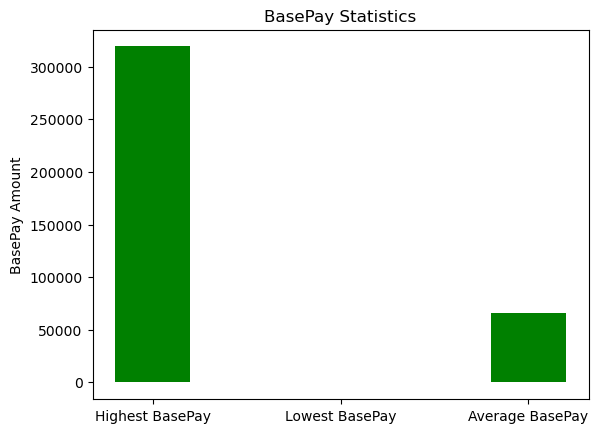

In [535]:
stats = {
    "Highest BasePay": df['BasePay'].max(),
    "Lowest BasePay": df['BasePay'].min(),
    "Average BasePay": df['BasePay'].mean()
}
plt.bar(stats.keys(), stats.values(),width=0.4,color='green')
plt.title("BasePay Statistics")
plt.ylabel("BasePay Amount")
plt.show()

### Replace 'Not Provided' in EmployeeName' Column to NaN 
     In EmployeeName column some name are mark as Not Provided replace them with NaN

In [537]:
df['EmployeeName'] = df['EmployeeName'].replace('Not Provided','NaN')
df[df['EmployeeName']=='Not Provided']

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year


### Drop The Rows Having 5 Missing Values

In [539]:
df.drop(df[df.isnull().sum(axis=1)==5].index, axis=0,inplace = True)

In [540]:
df.isnull().sum(axis=1)

0         1
1         1
2         1
3         1
4         1
         ..
148649    0
148650    4
148651    4
148652    4
148653    0
Length: 148654, dtype: int64

### Find job title of ALBERT PARDINI  and  how much ALBERT PARDINI make [ Include Benefits ]?

In [542]:
df[df["EmployeeName"]=='ALBERT PARDINI'][['EmployeeName','JobTitle','TotalPayBenefits']]

,EmployeeName,JobTitle,TotalPayBenefits
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),335279.91


- The jon title of employee name ALBERT PARDINI is CAPTAIN III [ POLICE DEPARTMENT ] and total pay benefits is 335279.91

### Display Name of The Person Having The Highest BasePay

In [545]:
df[df["BasePay"] == df['BasePay'].max()] [['EmployeeName','BasePay']]

,EmployeeName,BasePay
72925,Gregory P Suhr,319275.01


- The person having highest BasePay is Gregory P. Suhr with Base pay of  319275.01

### Find Average BasePay of All Employee Per Year 

In [548]:
df['Year'].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

In [549]:
df.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

- The contain data of total four year with average base pay of 
- year 2011 - 63595.956517
- year 2012 - 65436.406857
- year 2013 - 69630.030216
- year 2014 - 66564.421924
- The year 2013 has highest average base pay and 2011 has lowest 

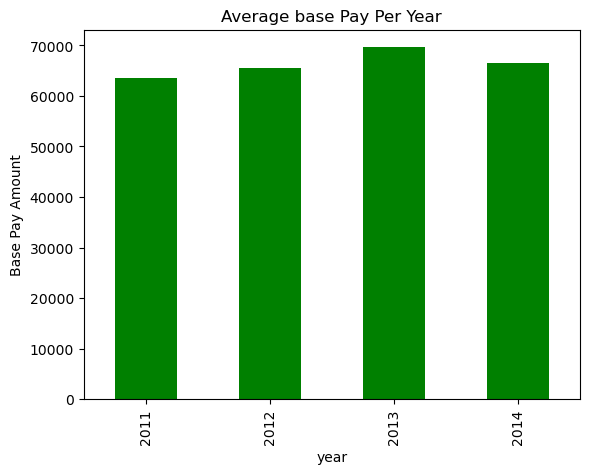

In [551]:
df.groupby('Year')['BasePay'].mean().plot(kind='bar',color='green')
plt.title("Average base Pay Per Year")
plt.xlabel("year")
plt.ylabel("Base Pay Amount")
plt.show()

### Find Average BasePay of All Employee Per JobTitle

In [553]:
df.groupby('JobTitle')['BasePay'].mean()

JobTitle
ACCOUNT CLERK                                     43300.806506
ACCOUNTANT                                        46643.172000
ACCOUNTANT INTERN                                 28732.663958
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     66374.400000
                                                      ...     
X-RAY LABORATORY AIDE                             47664.773077
X-Ray Laboratory Aide                             46086.387100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    52609.910000
Youth Comm Advisor                                39077.957500
ZOO CURATOR                                       43148.000000
Name: BasePay, Length: 2159, dtype: float64

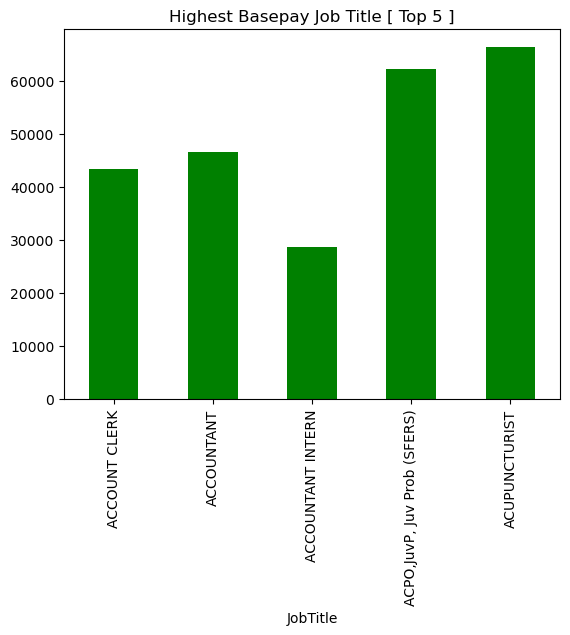

In [554]:
df.groupby('JobTitle')['BasePay'].mean().head().plot(kind='bar',color='green')
plt.title("Highest Basepay Job Title [ Top 5 ]")
plt.show()

###  Find Average BasePay of Employee Having Job Title ACCOUNTANT 

In [556]:
df[df["JobTitle"]=='ACCOUNTANT']['BasePay'].mean()

46643.172

- The average base pay of employee having job title ACCOUNTANT is 46643.172

### Find Top 5 Most Common Jobs

In [559]:
df['JobTitle'].value_counts().head(5)

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64

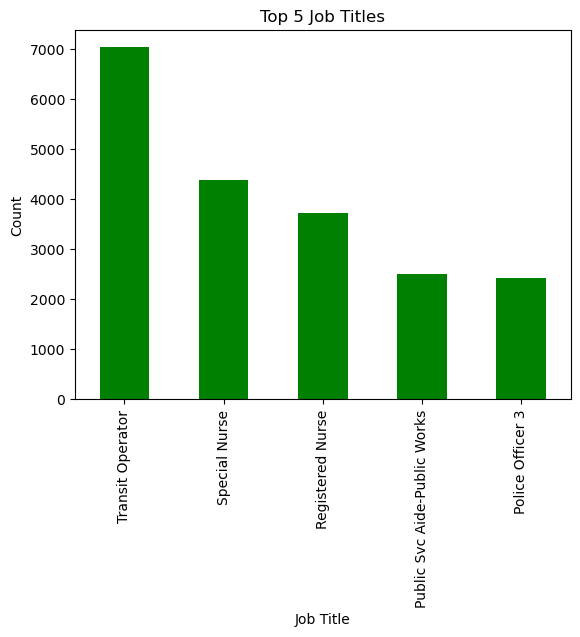

In [560]:
# Get top 5 job titles by count
df['JobTitle'].value_counts().head(5).plot(kind='bar',color='green')
plt.title("Top 5 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.show()

### Find Average Basepay , OvertimePay , OtherPay and TotalPay

In [661]:
print("Average BasePay ::", df['BasePay'].mean())
print("Average OvertimePay ::", df['OvertimePay'].mean())
print("Average OtherPay ::", df['OtherPay'].mean())
print("Average TotalPay ::", df['TotalPay'].mean())

Average BasePay :: 66325.4488404877
Average OvertimePay :: 5066.059886444667
Average OtherPay :: 3648.767296804575
Average TotalPay :: 74768.32197169267


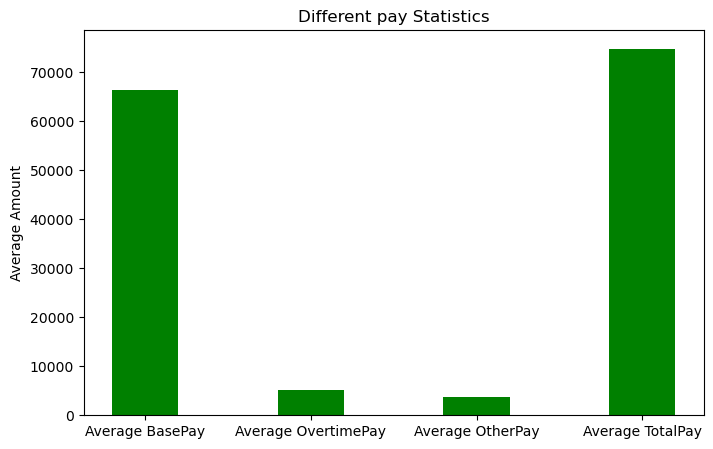

In [644]:
plt.figure(figsize=(8,5))
stats = {
    "Average BasePay": df['BasePay'].mean(),
    "Average OvertimePay": df['OvertimePay'].mean(),
    "Average OtherPay": df['OtherPay'].mean(),
    "Average TotalPay": df['TotalPay'].mean()
}
plt.bar(stats.keys(), stats.values(),width=0.4,color='green')
plt.title("Different pay Statistics")
plt.ylabel("Average Amount")
plt.show()